Dated 12/02/25

*   Aditi
*   M.Tech. CSA
*   242211001
*   Timestamp: 12.15 PM

In [1]:
from google.colab import files
uploaded=files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline

In [3]:
df=pd.read_csv("diabetes.csv")

Data Exploration and Preprocessing:
1. Analyze the distribution of each feature.
2. Handle missing values (if any) appropriately.
3. Perform feature scaling if required

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]>

In [7]:
df.shape

(768, 9)

In [8]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: xlabel='Age', ylabel='Density'>

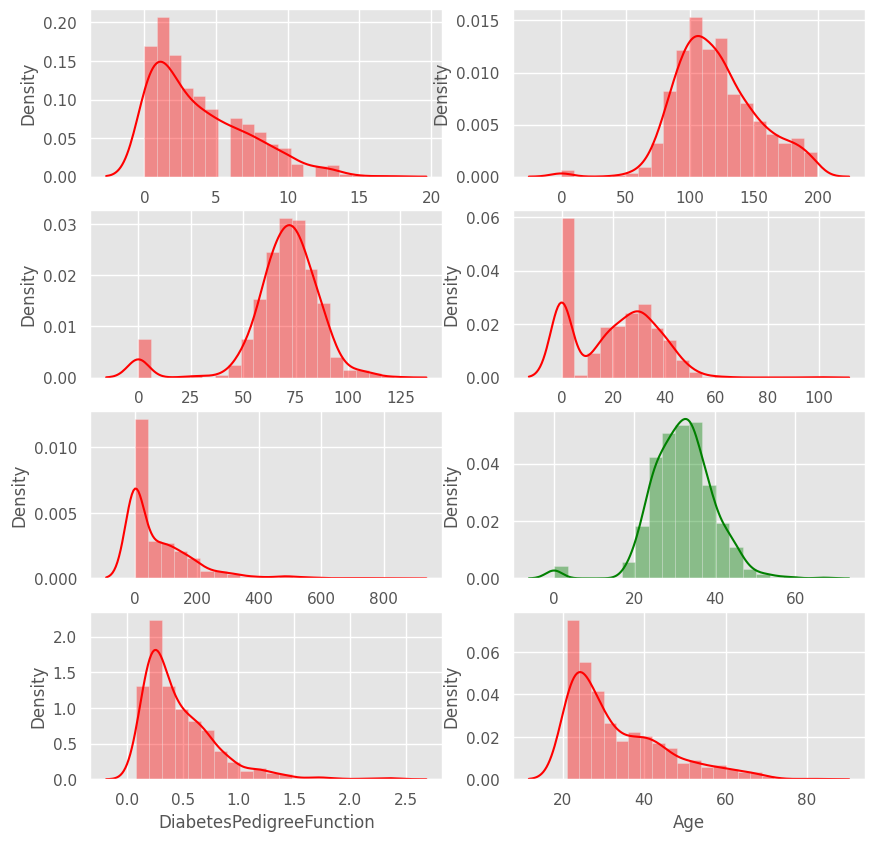

In [38]:
fig,ax = plt.subplots(4,2, figsize=(10,10))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="green")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="red")

In [17]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


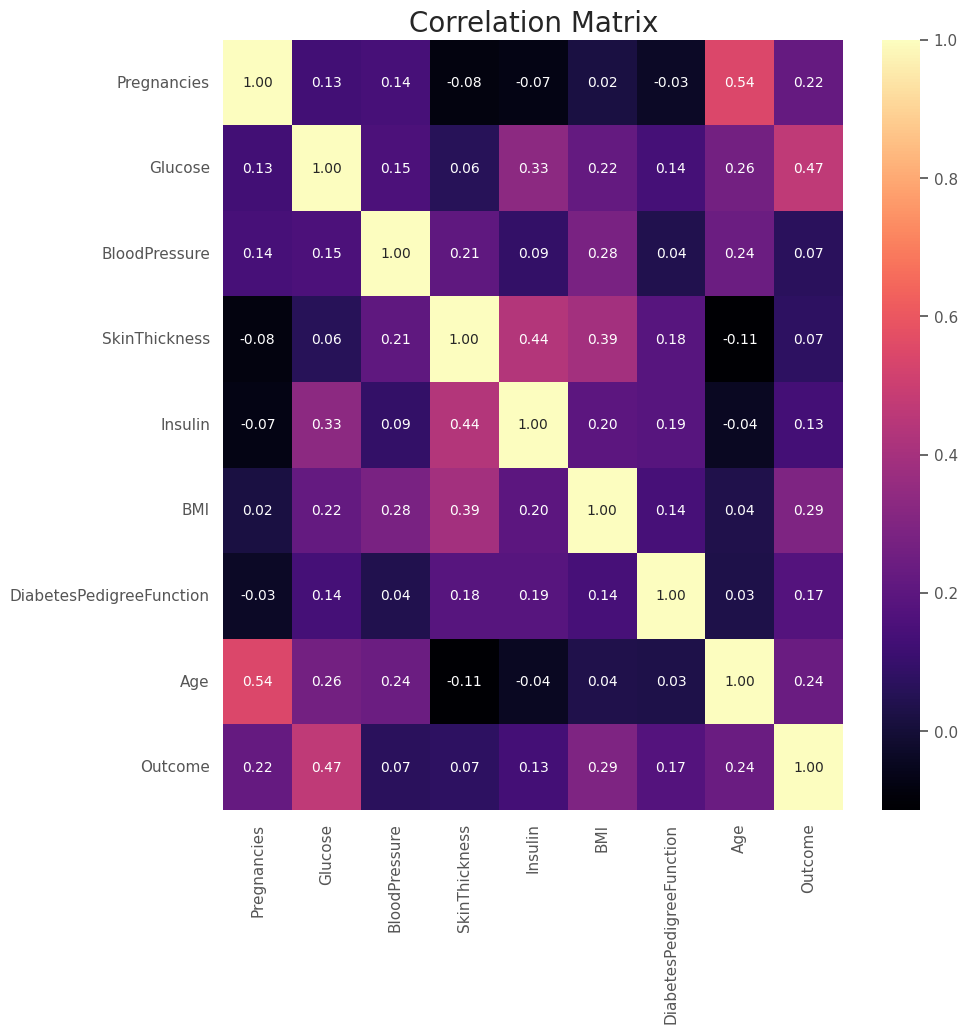

In [19]:
f,ax = plt.subplots(figsize=[10,10])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [22]:
y=df['Outcome']
X=df.drop(['Outcome'], axis=1)

In [23]:
cols = X.columns
index = X.index

In [24]:
from sklearn.preprocessing import RobustScaler
s = RobustScaler().fit(X)
X=s.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

Model Implementation:
1. Split the dataset into training and testing sets (e.g., 80-20 split).
2. Build and train a Decision Tree model using a library like Scikit-learn.
3. Experiment with hyperparameters such as the maximum depth, minimum
samples per leaf, and splitting criteria (e.g., Gini Index, Entropy).

In [25]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [27]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print("Accuracy of training set is: ", accuracy_score(y_train, DT.predict(X_train)))
print("Accuracy of training set is: ",accuracy_score(y_test, DT.predict(X_test)))
print("\nConfusion matrix: \n")
print(confusion_matrix(y_test, y_pred))
print("\nClassification report: \n")
print(classification_report(y_test, y_pred))

Accuracy of training set is:  1.0
Accuracy of training set is:  0.7792207792207793

Confusion matrix: 

[[86 21]
 [13 34]]

Classification report: 

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       107
           1       0.62      0.72      0.67        47

    accuracy                           0.78       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.79      0.78      0.78       154



In [36]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [37]:
DT = DecisionTreeClassifier(criterion='entropy')
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print("Accuracy of training set is: ", accuracy_score(y_train, DT.predict(X_train)))
print("Accuracy of training set is: ",accuracy_score(y_test, DT.predict(X_test)))
print("\nConfusion matrix: \n")
print(confusion_matrix(y_test, y_pred))
print("\nClassification report: \n")
print(classification_report(y_test, y_pred))

Accuracy of training set is:  1.0
Accuracy of training set is:  0.7337662337662337

Confusion matrix: 

[[79 28]
 [13 34]]

Classification report: 

              precision    recall  f1-score   support

           0       0.86      0.74      0.79       107
           1       0.55      0.72      0.62        47

    accuracy                           0.73       154
   macro avg       0.70      0.73      0.71       154
weighted avg       0.76      0.73      0.74       154



Hyperparameter tuning

In [28]:
hp = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['auto','sqrt','log2']
}
grid_search_dt = GridSearchCV(DT, hp, cv=50, n_jobs=-1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'radom']},
             verbose=1)

In [29]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [30]:
grid_search_dt.best_score_

0.7556410256410256

In [32]:
DT = grid_search_dt.best_estimator_
y_pred = DT.predict(X_test)
print("Accuracy of training set is: ", accuracy_score(y_train, DT.predict(X_train)))
print("Accuracy of training set is: ",accuracy_score(y_test, DT.predict(X_test)))
print("\nConfusion matrix: \n")
print(confusion_matrix(y_test, y_pred))
print("\nClassification report: \n")
print(classification_report(y_test, y_pred))

Accuracy of training set is:  0.7638436482084691
Accuracy of training set is:  0.7597402597402597

Confusion matrix: 

[[93 14]
 [23 24]]

Classification report: 

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       107
           1       0.63      0.51      0.56        47

    accuracy                           0.76       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.75      0.76      0.75       154



Visualization

In [33]:
from sklearn import tree
text_representation = tree.export_text(DT)
print(text_representation)

|--- feature_1 <= 0.16
|   |--- feature_0 <= 0.70
|   |   |--- feature_5 <= -0.55
|   |   |   |--- class: 0
|   |   |--- feature_5 >  -0.55
|   |   |   |--- class: 0
|   |--- feature_0 >  0.70
|   |   |--- feature_5 <= -0.62
|   |   |   |--- class: 0
|   |   |--- feature_5 >  -0.62
|   |   |   |--- class: 0
|--- feature_1 >  0.16
|   |--- feature_5 <= -0.21
|   |   |--- feature_0 <= -0.30
|   |   |   |--- class: 0
|   |   |--- feature_0 >  -0.30
|   |   |   |--- class: 0
|   |--- feature_5 >  -0.21
|   |   |--- feature_1 <= 0.98
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.98
|   |   |   |--- class: 1



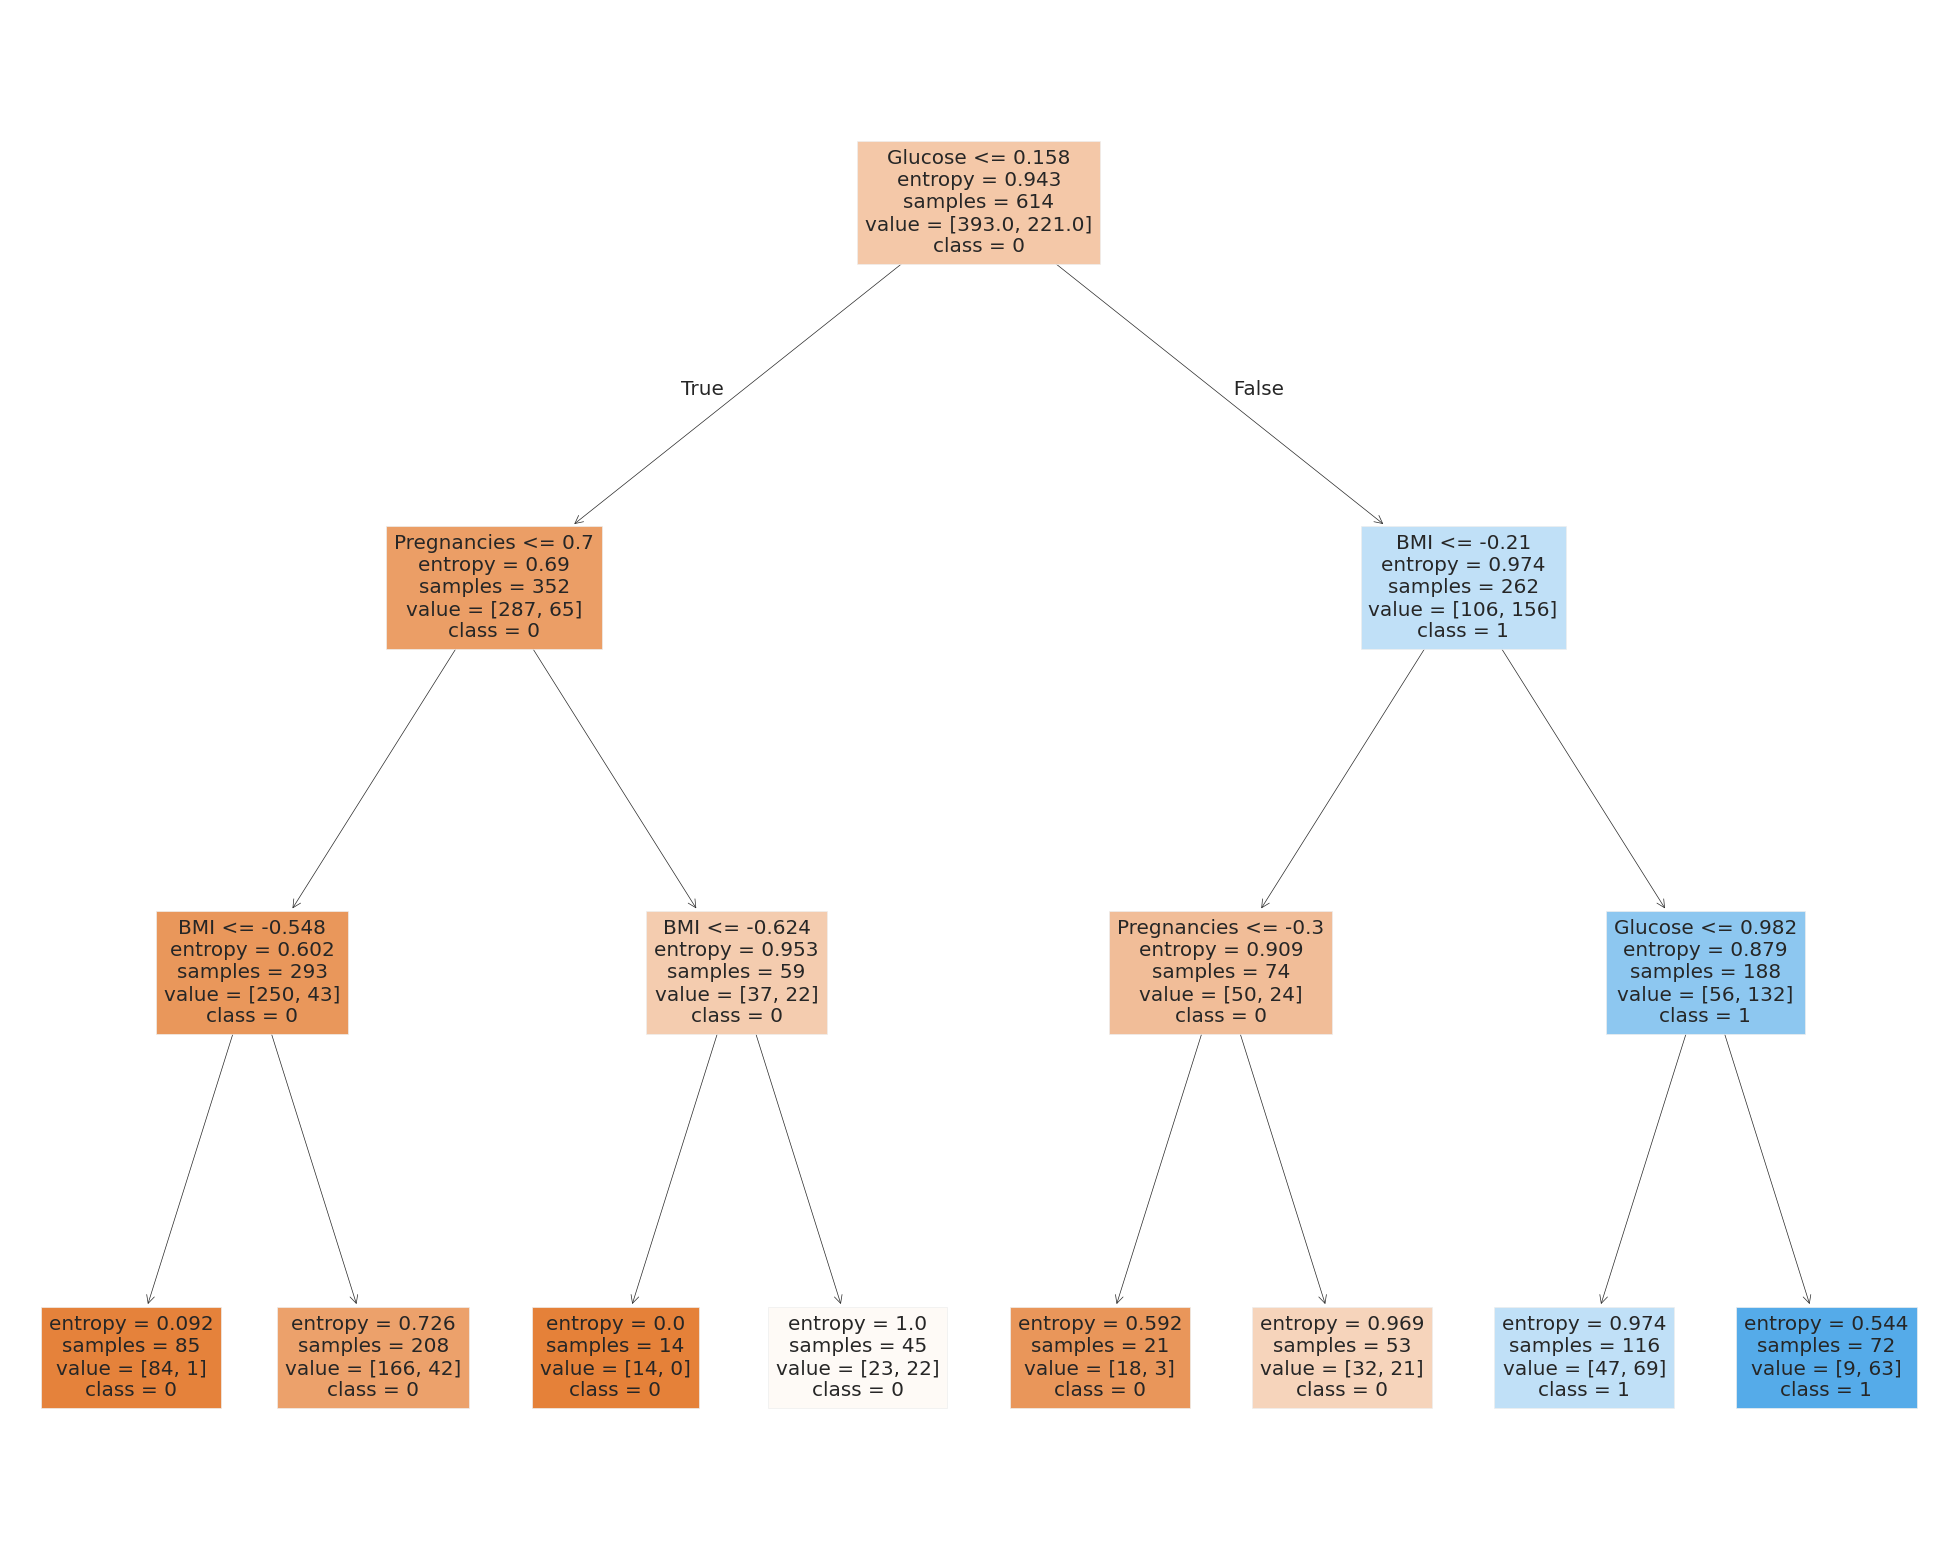

In [35]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT,
                   feature_names=X.columns,
                   class_names=['0', "1"],
                   filled=True)

1. Which splitting criterion (Gini Index or Entropy) performed better for this dataset,and why might that be the case?

Ans. Gini had a better performance whnen all the parameters were same.
After hyperparameter tuning, entropy turned out to be the better case as it was slightly more sensitive to class distribution imbalances present in the given medical dataset. Even though Gini was better alone, due to the sensitivity factor, entropy should be preferred.

2. Is there any noticeable trend between "BMI" and diabetes presence in the dataset?

Ans. BMI has a slightly positive correlation with diabetes.
